In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('../')

In [3]:
import numpy as np
import scipy.constants as const

import trazar as tzr
import grodi as gro
import carrus as car
import plazma as pz

In [4]:
grid_data = gro.GridData('grid-ipa-100x60-bf', defpath= 'data/')

In [5]:
nvols = grid_data.nvols
nchrgs = grid_data.nchrgs

In [6]:
efreq = np.zeros((nvols, nchrgs))
ifreq = np.zeros((nvols, nchrgs))
tfreq = np.zeros((nvols, nchrgs))

In [7]:
power = 1. * 1./const.elementary_charge

In [8]:
plasmasystem = pz.PlasmaSystem(4e-2,
                                6e-2,
                                300.0,
                                300.0,
                                0.1,
                                29.0/30.0,
                                6.6335209e-26,
                                5.3150534e-26,
                                power,
                                1.0)

In [9]:
cf = car.CollisionFrequency(plasmasystem, grid_data)

In [10]:
cf.compute_collisionfreq(3.0, 7.0e14, 7.0e14, efreq, ifreq, tfreq)

In [11]:
efreq.max()

5584480.0

In [12]:
ifreq.max()

148813.25

In [13]:
tfreq.max()

14202665657171.809

In [14]:
currs = [efreq[20, :]*const.elementary_charge,
         ifreq[20, :]*const.elementary_charge,
         tfreq[20, :]*const.elementary_charge]
         
labels = ['e', 'Ar+', 'Tunnel']

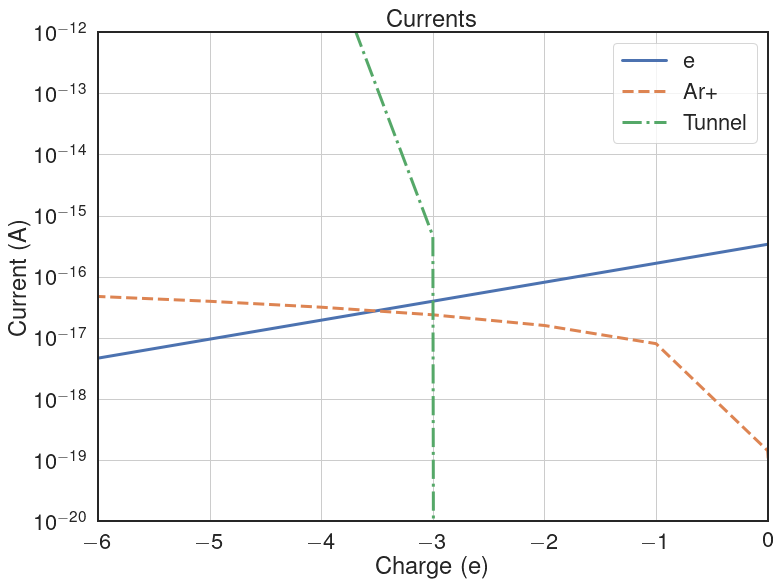

In [15]:
tzr.plot_plain(grid_data.qpivots, currs, title="Currents",
               axislabel=['Charge (e)', r'Current (A)'],
               logx=False, logy=True, labels=labels,
               xlim=[-6,0], ylim=[1e-20, 1e-12])

In [16]:
currs = [efreq[53, :]*const.elementary_charge,
         ifreq[53, :]*const.elementary_charge,
         tfreq[53, :]*const.elementary_charge]
         
labels = ['e', 'Ar+', 'Tunnel']

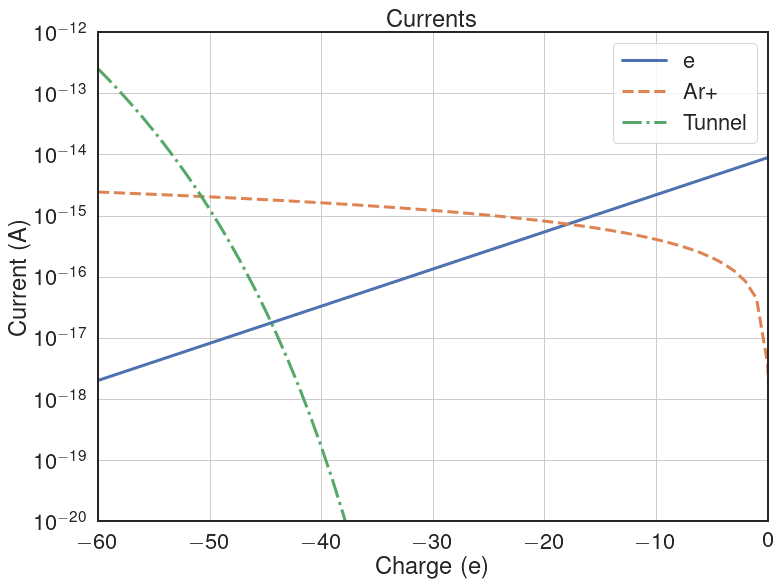

In [17]:
tzr.plot_plain(grid_data.qpivots, currs, title="Currents",
               axislabel=['Charge (e)', r'Current (A)'],
               logx=False, logy=True, labels=labels,
               xlim=[-60,0], ylim=[1e-20, 1e-12])